# #2 Martingale

Recall some definitions:
- Definition<br>
Given a sequence of random variables $X_t$ and a $\sigma$ algebra $F_t$(one may think of information set), we say $X_t$ is ***`adapted`*** to $F_t$ if $X_t \in F_t$, i.e., when $X_t$ is $F_t$-measurable.

- Definition<br>
When $E(X_t | F_s) = X_s$ for $t > s$, we say $X_t$ martingale.

- ex: Fair game would be a martingale.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Simple Random Walk
Consider $X_i$ i.i.d. with
$X_i = \begin{cases}
            1 (\text{with probability} \frac{1}{2}) \\
            -1 (\text{with probability} \frac{1}{2})
        \end{cases}$
(in other words this is a fair-coin flips) and their sum until time $n$:
$$
    S_n = \sum_{i=1}^n X_n, \quad S_0 = 0.
$$

i.e. we are considering a position at time $n$, on 1D line. Now information set( which is all coin flip results until time $i$) is given as $F_i = \sigma(X_1, X_2, \ldots, X_i)$, which is a whole information until time $i$.

Then $S_n$ is ($F_n$-)martingale: $E(S_n | F_m) = S_m$ for $n > m$.

For example, when $S_5 = 3$ and $F_5 = X_1, X_2, X_3, X_4, X_5$, 
$$
    E(S_6 | F_5) = (3 + 1) \text{ x } 0.5 + (3 - 1) \text{ x } 0.5 = 3 = S_5.
$$

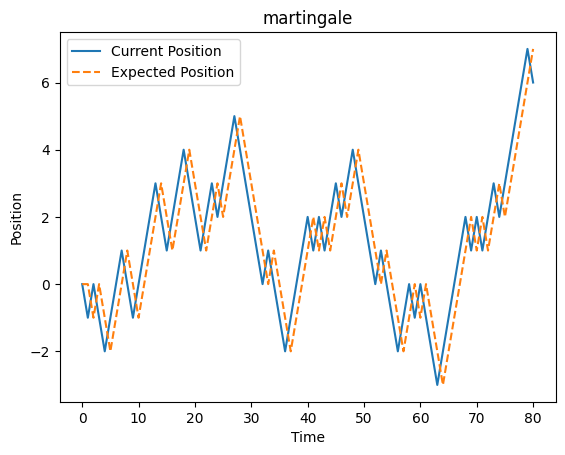

In [2]:
'''
simple random walk is martingale
using SRW, we check this graphically (true)
so that its expected position at time t+1 is equal to the position at time t 
'''
def coin_toss():
    return np.random.choice([-1, 1])  # either tail or head, resp.

def simple_random_walk(num_periods):
    time = np.arange(num_periods + 1)
    current_pos = 0  # current position
    expected_pos = (current_pos + 1) * 0.5 + (current_pos - 1) * 0.5
    path = [current_pos]
    expected_path = [expected_pos]

    for _ in range(num_periods):
        expected_pos = (current_pos + 1) * 0.5 + (current_pos - 1) * 0.5
        outcome = coin_toss()
        current_pos += outcome
        
        path.append(current_pos)
        expected_path.append(expected_pos)
    
    plt.plot(time, path)
    plt.plot(time, expected_path, linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend(['Current Position', 'Expected Position'])
    plt.title('martingale')
    plt.show()

simple_random_walk(80)

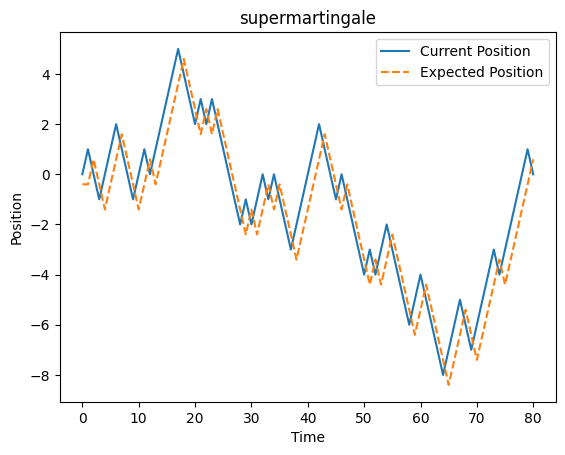

In [3]:
'''
also SRW becomes not martingale if p is not 0.5
here p = 0.3
we could see that expected position at time t is always less than the current position S_t
such situation is "supermartingale"(downtrend)
'''
def coin_toss():
    return np.random.choice([-1, 1])  # either tail or head, resp.

def simple_random_walk(num_periods):
    time = np.arange(num_periods + 1)
    current_pos = 0  # current position
    expected_pos = (current_pos + 1) * 0.3 + (current_pos - 1) * 0.7
    path = [current_pos]
    expected_path = [expected_pos]

    for _ in range(num_periods):
        expected_pos = (current_pos + 1) * 0.3 + (current_pos - 1) * 0.7
        outcome = coin_toss()
        current_pos += outcome
        
        path.append(current_pos)
        expected_path.append(expected_pos)
    
    plt.plot(time, path)
    plt.plot(time, expected_path, linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend(['Current Position', 'Expected Position'])
    plt.title('supermartingale')
    plt.show()

simple_random_walk(80)

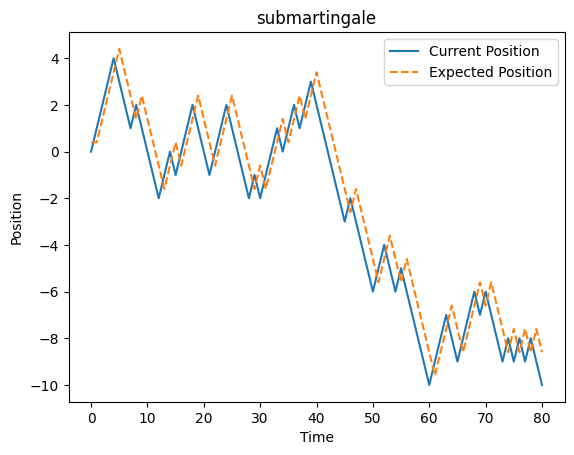

In [4]:
'''
also SRW becomes not martingale if p is not 0.5
here p = 0.7
we could see that expected position at time t is always greater than the current position S_t
such situation is "submartingale"(uptrend)

asset prices discounted by the risk-free rate wwill be submartingales under the tru probabilities,
but become martingales under the risk-adjusted probabilities
'''
def coin_toss():
    return np.random.choice([-1, 1])  # either tail or head, resp.

def simple_random_walk(num_periods):
    time = np.arange(num_periods + 1)
    current_pos = 0  # current position
    expected_pos = (current_pos + 1) * 0.7 + (current_pos - 1) * 0.3
    path = [current_pos]
    expected_path = [expected_pos]

    for _ in range(num_periods):
        expected_pos = (current_pos + 1) * 0.7 + (current_pos - 1) * 0.3
        outcome = coin_toss()
        current_pos += outcome
        
        path.append(current_pos)
        expected_path.append(expected_pos)
    
    plt.plot(time, path)
    plt.plot(time, expected_path, linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend(['Current Position', 'Expected Position'])
    plt.title('submartingale')
    plt.show()

simple_random_walk(80)

checking martingale numerically:

In [5]:
'''
check martingale-ness of SRW only numerically
'''
def coin_toss():
    return np.random.choice([-1, 1])  # either tail or head, resp.

def simple_random_walk(num_periods):
    time = np.arange(num_periods + 1)
    current_pos = 0  # current position
    expected_pos = (current_pos + 1) * 0.5 + (current_pos - 1) * 0.5
    # path = [current_pos]
    # expected_path = [expected_pos]

    for _ in range(num_periods):        
        expected_pos = (current_pos + 1) * 0.5 + (current_pos - 1) * 0.5
        print("expected position:", expected_pos)
        outcome = coin_toss()
        current_pos += outcome

        print("current position:", current_pos)        
        print()
        
        # path.append(current_pos)
        # expected_path.append(expected_pos)

simple_random_walk(80)

'''
one can easily see that expected position S_{t+1} at time t is always the current position S_t
'''

expected position: 0.0
current position: 1

expected position: 1.0
current position: 2

expected position: 2.0
current position: 1

expected position: 1.0
current position: 2

expected position: 2.0
current position: 3

expected position: 3.0
current position: 2

expected position: 2.0
current position: 3

expected position: 3.0
current position: 4

expected position: 4.0
current position: 3

expected position: 3.0
current position: 2

expected position: 2.0
current position: 3

expected position: 3.0
current position: 4

expected position: 4.0
current position: 3

expected position: 3.0
current position: 4

expected position: 4.0
current position: 5

expected position: 5.0
current position: 4

expected position: 4.0
current position: 5

expected position: 5.0
current position: 4

expected position: 4.0
current position: 3

expected position: 3.0
current position: 2

expected position: 2.0
current position: 3

expected position: 3.0
current position: 4

expected position: 4.0
current p

'\none can easily see that expected position S_{t+1} at time t is always the current position S_t\n'

In [6]:
'''
check martingale-ness of SRW only numerically
but when p=0.3
'''
def coin_toss():
    return np.random.choice([-1, 1])  # either tail or head, resp.

def simple_random_walk(num_periods):
    time = np.arange(num_periods + 1)
    current_pos = 0  # current position
    expected_pos = (current_pos + 1) * 0.3 + (current_pos - 1) * 0.7
    # path = [current_pos]
    # expected_path = [expected_pos]

    for _ in range(num_periods):        
        expected_pos = (current_pos + 1) * 0.3 + (current_pos - 1) * 0.7
        print("expected position:", expected_pos)
        outcome = coin_toss()
        current_pos += outcome

        print("current position:", current_pos)        
        print()
        
        # path.append(current_pos)
        # expected_path.append(expected_pos)

simple_random_walk(80)

'''
obviously martingale is broken this time
one can easily see that expected position S_{t+1} at time t is always less than the current position S_t
'''

expected position: -0.39999999999999997
current position: -1

expected position: -1.4
current position: -2

expected position: -2.3999999999999995
current position: -3

expected position: -3.4
current position: -4

expected position: -4.4
current position: -5

expected position: -5.3999999999999995
current position: -4

expected position: -4.4
current position: -5

expected position: -5.3999999999999995
current position: -4

expected position: -4.4
current position: -5

expected position: -5.3999999999999995
current position: -4

expected position: -4.4
current position: -3

expected position: -3.4
current position: -2

expected position: -2.3999999999999995
current position: -1

expected position: -1.4
current position: -2

expected position: -2.3999999999999995
current position: -3

expected position: -3.4
current position: -2

expected position: -2.3999999999999995
current position: -1

expected position: -1.4
current position: -2

expected position: -2.3999999999999995
current posi

'\nobviously martingale is broken this time\none can easily see that expected position S_{t+1} at time t is always less than the current position S_t\n'

In [7]:
'''
check martingale-ness of SRW only numerically
what if p=0.7 ?
'''
def coin_toss():
    return np.random.choice([-1, 1])  # either tail or head, resp.

def simple_random_walk(num_periods):
    time = np.arange(num_periods + 1)
    current_pos = 0  # current position
    expected_pos = (current_pos + 1) * 0.7 + (current_pos - 1) * 0.3
    # path = [current_pos]
    # expected_path = [expected_pos]

    for _ in range(num_periods):        
        expected_pos = (current_pos + 1) * 0.7 + (current_pos - 1) * 0.3
        print("expected position:", expected_pos)
        outcome = coin_toss()
        current_pos += outcome

        print("current position:", current_pos)        
        print()
        
        # path.append(current_pos)
        # expected_path.append(expected_pos)

simple_random_walk(80)

'''
obviously martingale is broken this time
one can easily see that expected value(S_{t+1}) at time t is always greater than the current value S_t
'''

expected position: 0.39999999999999997
current position: 1

expected position: 1.4
current position: 0

expected position: 0.39999999999999997
current position: -1

expected position: -0.6
current position: -2

expected position: -1.5999999999999999
current position: -3

expected position: -2.5999999999999996
current position: -4

expected position: -3.5999999999999996
current position: -3

expected position: -2.5999999999999996
current position: -4

expected position: -3.5999999999999996
current position: -5

expected position: -4.6
current position: -6

expected position: -5.6
current position: -5

expected position: -4.6
current position: -6

expected position: -5.6
current position: -5

expected position: -4.6
current position: -4

expected position: -3.5999999999999996
current position: -3

expected position: -2.5999999999999996
current position: -2

expected position: -1.5999999999999999
current position: -3

expected position: -2.5999999999999996
current position: -4

expected p

'\nobviously martingale is broken this time\none can easily see that expected value(S_{t+1}) at time t is always greater than the current value S_t\n'

## 2 Brownian Motion

Denote a Brownian motion by $B_t$.